In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import enum
import copy
import connect4.connect4 as game
from pympler import asizeof
import deeplearning.buffer as buf
import torch 
import torch.nn as nn
import torch.optim as optim
import deeplearning.mlp as mlp
import torch.nn.functional as F
from deeplearning.league import League
import matplotlib.pyplot as plt

In [2]:
lea = League()

In [3]:
while True:
    lea.play_season()

Season 0 training new Agent
100 194.59043622016907 65 1.9451944
200 194.56653106212616 65 1.9451944
300 194.557603597641 232 1.9440917
400 194.54226076602936 232 1.9440917
Random Play
0  vs  1
p1:  0.31 p2:  0.69 draw:  0.0
0  vs  2
p1:  0.26 p2:  0.74 draw:  0.0
0  vs  1
p1:  0.34 p2:  0.66 draw:  0.0
1  vs  2
p1:  0.42 p2:  0.58 draw:  0.0
0  vs  2
p1:  0.3 p2:  0.69 draw:  0.01
1  vs  0
p1:  0.71 p2:  0.29 draw:  0.0
0  vs  2
p1:  0.31 p2:  0.69 draw:  0.0
1  vs  2
p1:  0.41 p2:  0.57 draw:  0.02
2  vs  0
p1:  0.66 p2:  0.34 draw:  0.0
2  vs  1
p1:  0.59 p2:  0.41 draw:  0.0
1  vs  0
p1:  0.68 p2:  0.32 draw:  0.0
0  vs  1
p1:  0.29 p2:  0.71 draw:  0.0
0  vs  1
p1:  0.33 p2:  0.67 draw:  0.0
0  vs  1
p1:  0.28 p2:  0.72 draw:  0.0
0  vs  2
p1:  0.32 p2:  0.68 draw:  0.0
0  vs  2
p1:  0.28 p2:  0.72 draw:  0.0
2  vs  1
p1:  0.55 p2:  0.43 draw:  0.02
1  vs  0
p1:  0.68 p2:  0.32 draw:  0.0
2  vs  1
p1:  0.61 p2:  0.39 draw:  0.0
0  vs  2
p1:  0.32 p2:  0.68 draw:  0.0
2  vs  0
p1:  

ValueError: probabilities contain NaN

In [4]:
lea.elo_history

{0: [842.0, 817.0, 819.0, 778.0, 777.0, 770.0],
 1: [1004.0, 940.0, 928.0, 876.0, 841.0, 874.0],
 2: [1154.0, 1111.0, 1044.0, 1020.0, 995.0, 984.0],
 3: [0, 1132.0, 1025.0, 1018.0, 1008.0, 989.0],
 4: [0, 0, 1184.0, 1178.0, 1174.0, 1153.0],
 5: [0, 0, 0, 1130.0, 1134.0, 1134.0],
 6: [0, 0, 0, 0, 1071.0, 1074.0],
 7: [0, 0, 0, 0, 0, 1021.0]}

In [5]:
gm = game.GameManager([lea.players[0], lea.players[2]])
b = buf.ReplayBuffer(10)
gm.play(2, game.Connect4, b)


TypeError: GameManager.__init__() takes 2 positional arguments but 3 were given

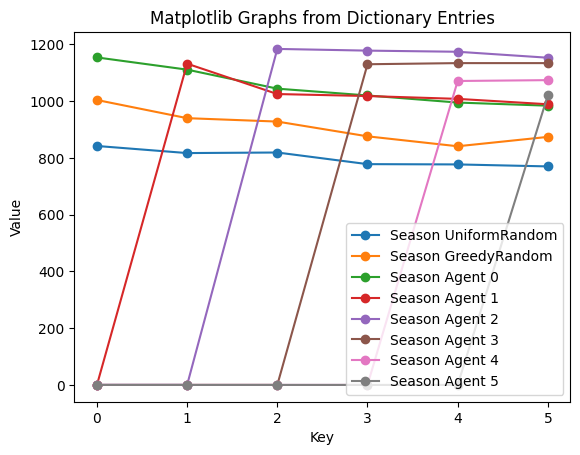

In [5]:
import matplotlib.pyplot as plt

data = lea.elo_history

# Iterate through the dictionary entries and create separate plots
for key, values in data.items():
    name = f'Agent {key-2}'
    if key == 0:
        name = f'UniformRandom'
    elif key == 1:
        name = f'GreedyRandom'
    plt.plot([x for x in range(0, len(values))], values, marker='o', label=f'Season {name}')

# Add labels and title
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Matplotlib Graphs from Dictionary Entries')
plt.legend()  # Add legend to differentiate between entries

# Show the plots
plt.show()